In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep = ';', decimal = ',')

In [3]:
#removing the last two columns from the dataframe
df = df.drop(columns = ['Unnamed: 15', 'Unnamed: 16'])

In [4]:
#now remove all of the rows from 9357th row, since rest of the rows contain null values (we got this information from dataset documentation)
df = df[:9357]
df.shape
#Now we have to find out how many -200 values are present in the dataset, so that we can replace them
df.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [5]:
#Now first replace them by null value, then replace them by the median
df = df.replace(to_replace = -200, value = np.NaN)
columns_median = df.mean(numeric_only=True)
df= df.fillna(columns_median)

#convert date formate from DD/MM/YYYY to YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#convert time formate 
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

# Calculate lower and upper percentile thresholds
lower_percentile = df['CO(GT)'].quantile(0.01)
upper_percentile = df['CO(GT)'].quantile(0.99)
outliers = df[(df['CO(GT)'] < lower_percentile) | (df['CO(GT)'] > upper_percentile)]
df.shape

(9357, 15)

In [6]:
# df = df[(df['CO(GT)']>lower_percentile) & (df['CO(GT)']<upper_percentile)]
df.shape

(9079, 15)

In [7]:
#Now, let's take CO(GT) as dependent variable and rest of the columns as independent variable.
# Selecting features and target
x_values = df[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
        'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
        'PT08.S5(O3)', 'T', 'RH', 'AH']]
y_values = df['CO(GT)']

In [8]:
# splitting the dataset into test(30%) and train(70%)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=42)
#train the model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [9]:
#now check the accuracy
print(y_test[:10])
print(y_pred[:10])
r2 = r2_score(y_test, y_pred)
r2*100

1421    2.15275
7394    5.60000
756     0.80000
1511    2.80000
276     0.60000
1750    2.10000
2713    4.40000
2001    2.15275
2984    0.50000
4428    2.15275
Name: CO(GT), dtype: float64
[2.11686359 4.81435063 0.66921185 2.42238238 1.2439745  2.24983972
 3.48427447 2.0565939  0.86632405 1.71821813]


80.16830253920368

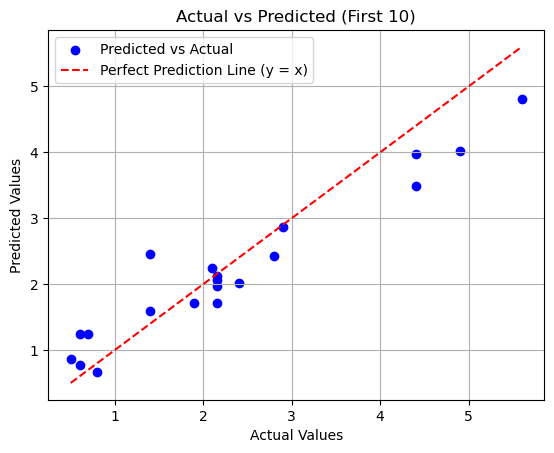

In [10]:
y_true = y_test[:20]
y_predicted = y_pred[:20]

plt.scatter(y_true, y_predicted, color='blue', label='Predicted vs Actual')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction Line (y = x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (First 10)')
plt.legend()
plt.grid(True)
plt.show()


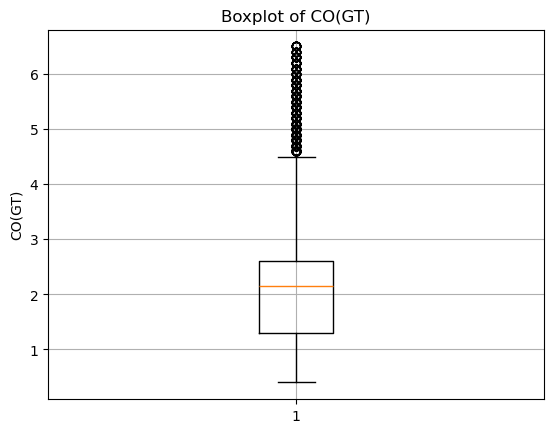

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(df['CO(GT)'])
plt.title('Boxplot of CO(GT)')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()
